# 타이타닉 종합 분석

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

In [2]:
ti =pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
print(ti.shape)
print()
print(ti.head())

(891, 8)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age     Fare  \
0                            Braund, Mr. Owen Harris    male  22.0   7.2500   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  71.2833   
2                             Heikkinen, Miss. Laina  female  26.0   7.9250   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  53.1000   
4                           Allen, Mr. William Henry    male  35.0   8.0500   

       Embarked  
0  Southhampton  
1     Cherbourg  
2  Southhampton  
3  Southhampton  
4  Southhampton  


In [3]:
# ti 컬럼 분석
ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
ti_num = ['Age', 'Fare']
ti_category = ['Sex', 'Pclass', 'Embarked', 'AgeGroup']
target = 'Survived'
key = 'PassengerId'

In [5]:
# 연령대 데이터 추가
bins = [(i // 10) * 10 for i in range(int(ti['Age'].min()), int(ti['Age'].max()) + 1, 10)] + [np.inf]
labels = [(i // 10) * 10 for i in range(int(ti['Age'].min()), int(ti['Age'].max()) + 1, 10)]
ti['AgeGroup'] = pd.cut(ti['Age'], bins=bins, labels=labels, right=False)
ti[['Age' , 'AgeGroup']]

,Age,AgeGroup
0,22.0,20
1,38.0,30
2,26.0,20
3,35.0,30
4,35.0,30
...,...,...
886,27.0,20
887,19.0,10
888,NaN,NaN
889,26.0,20


In [6]:
# Embarked 데이터 간소화 값 변경
ti['Embarked'] = ti['Embarked'].map({'Southhampton':'S', 'Cherbourg':'C', 'Queenstown':'Q'})
ti['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
# 숫자 타입 집계
for i in ti_num:
    print('*' * 10 + f' {i} ' + '*' * 10)
    print(f'median : {ti[i].median()}')
    print(f'mode : {ti[i].mode()}')
    print(ti[i].describe())
    print(f'nan : {ti[i].isna().sum()}')
    print()


********** Age **********
median : 28.0
mode : 0    24.0
Name: Age, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
nan : 177

********** Fare **********
median : 14.4542
mode : 0    8.05
Name: Fare, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
nan : 0



In [8]:
# 범주 값 체크
for i in ti_category:
    print(f'{i} : {ti[i].unique()}')

Survived : [0 1]
Sex : ['male' 'female']
Pclass : [3 1 2]
Embarked : ['S' 'C' 'Q' nan]
AgeGroup : [20, 30, NaN, 50, 0, 10, 40, 60, 70, 80]
Categories (9, int64): [0 < 10 < 20 < 30 ... 50 < 60 < 70 < 80]


### Survived - [Age, Fare] ( 범주 - 숫자 )

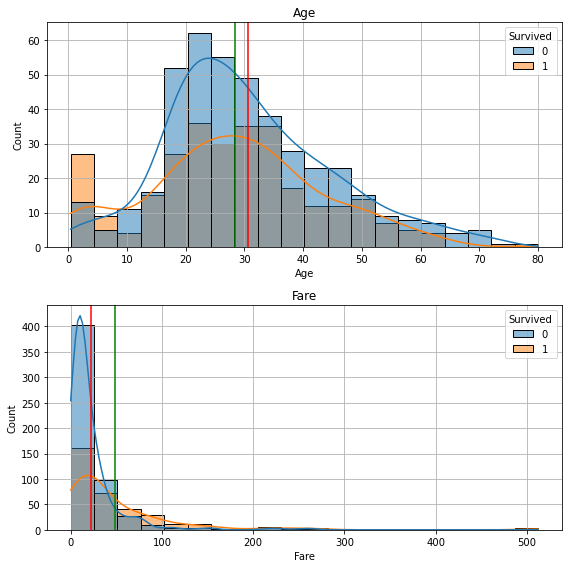

In [9]:
plt.figure(figsize=(8,8))
count = 1
for i in ti_num:
    s1 = ti.loc[ti[target] == 1, i]
    s0 = ti.loc[ti[target] == 0, i]
    plt.subplot(len(ti_num), 1, count)
    sns.histplot(data=ti, x=i, hue=target, bins=20, kde=True)
    plt.axvline(s0.mean(), color='r')
    plt.axvline(s1.mean(), color='g')
    plt.title(i)
    plt.grid()
    count += 1

plt.tight_layout()
plt.show()

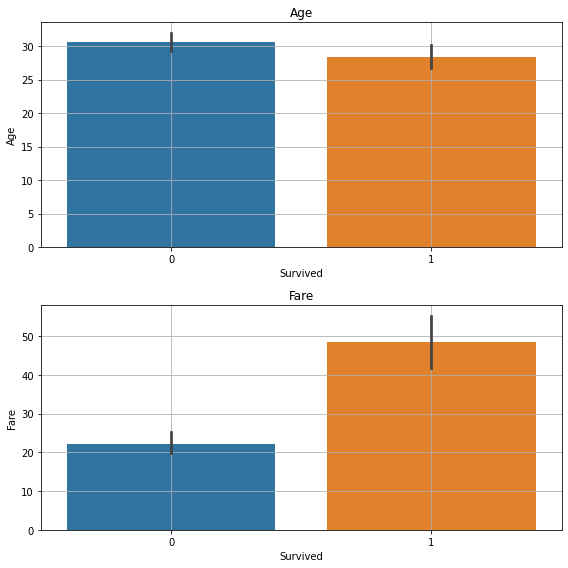

In [10]:
plt.figure(figsize=(8,8))
count = 1
for i in ti_num:
    plt.subplot(len(ti_num), 1, count)
    sns.barplot(x=target, y = i, data=ti)
    plt.title(i)
    plt.grid()
    count += 1

plt.tight_layout()
plt.show()

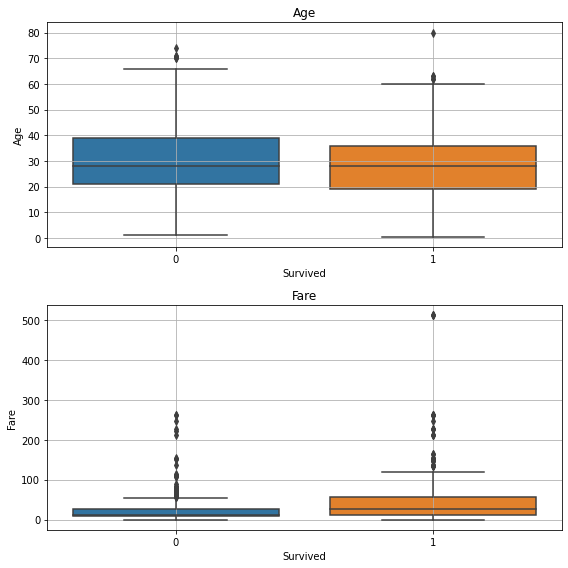

In [11]:
plt.figure(figsize=(8,8))
count = 1
for i in ti_num:
    plt.subplot(len(ti_num), 1, count)
    sns.boxplot(x=target, y = i, data=ti)
    plt.title(i)
    plt.grid()
    count += 1

plt.tight_layout()
plt.show()

In [12]:
# 수치화
for i in ti_num:
    ti_nan = ti.copy()
    if ti[i].isna().sum() > 0:
        ti_nan = ti.loc[ti[i].notnull()]

    s1 = ti_nan.loc[ti_nan[target] == 1, i]
    s0 = ti_nan.loc[ti_nan[target] == 0, i]
    
    print(f'{i} : {spst.ttest_ind(s0, s1)}')

Age : Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)
Fare : Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)


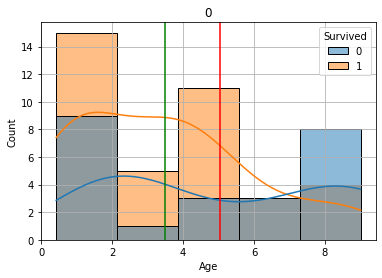

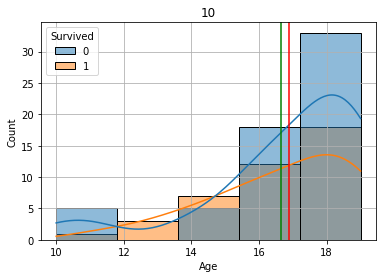

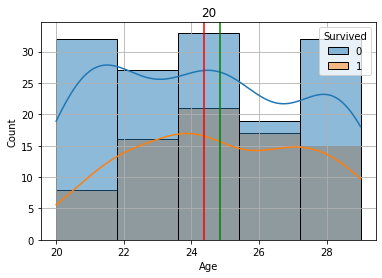

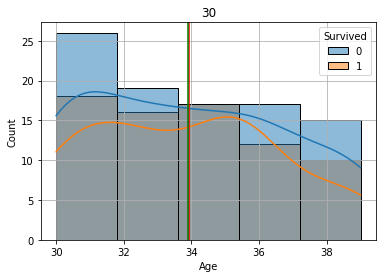

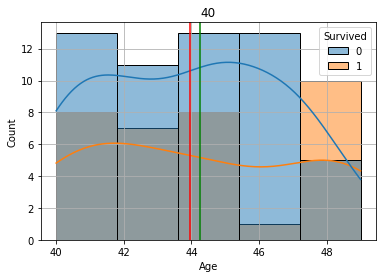

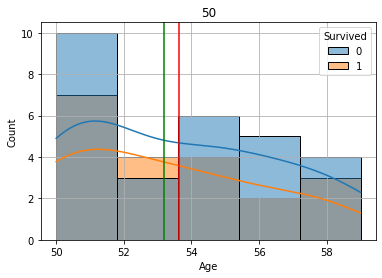

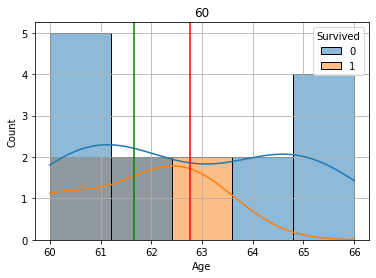

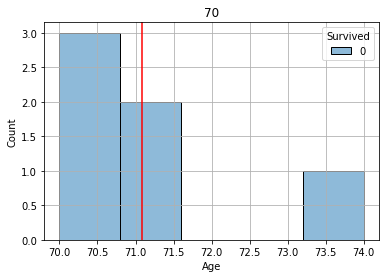

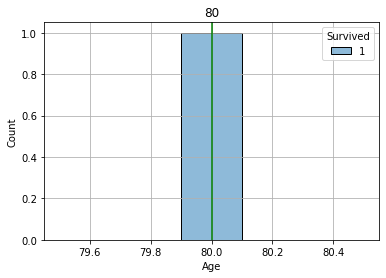

In [13]:
# 연령대(AgeGroup)별 분석
# plt.figure(figsize=(10,10))
count = 1
li_ageGroup = list(ti.loc[ti['AgeGroup'].notna(), 'AgeGroup'].unique())
li_ageGroup.sort()

for i in li_ageGroup:
    ti_ = ti.loc[ti['AgeGroup'] == i]
    s1 = ti_.loc[ti_[target] == 1, 'Age']
    s0 = ti_.loc[ti_[target] == 0, 'Age']
    # plt.subplot(9, 1, count)
    if len(s0) != 0 and len(s1) != 0:
        sns.histplot(data=ti_, x='Age', hue=target, bins=5, kde=True)
    else:
        sns.histplot(data=ti_, x='Age', hue=target, bins=5)
    plt.axvline(s0.mean(), color='r')
    plt.axvline(s1.mean(), color='g')
    plt.title(i)
    plt.grid()
    count += 1

    # plt.tight_layout()
    plt.show()

In [14]:
# 수치화
for i in li_ageGroup:
    ti_nan = ti.loc[ti['Age'].notnull() & (ti['AgeGroup'] == i)]

    s1 = ti_nan.loc[ti_nan[target] == 1, 'Age']
    s0 = ti_nan.loc[ti_nan[target] == 0, 'Age']
    
    print(f'{i} : {spst.ttest_ind(s0, s1)}')

0 : Ttest_indResult(statistic=2.1794260937204384, pvalue=0.033236371468113264)
10 : Ttest_indResult(statistic=0.5295802931764475, pvalue=0.5975767219201018)
20 : Ttest_indResult(statistic=-1.2031622014896264, pvalue=0.230218555029756)
30 : Ttest_indResult(statistic=0.10558298064913361, pvalue=0.9160414765146276)
40 : Ttest_indResult(statistic=-0.500263956856479, pvalue=0.6181523283879811)
50 : Ttest_indResult(statistic=0.4925791836461273, pvalue=0.624652974637406)
60 : Ttest_indResult(statistic=1.1545964691132673, pvalue=0.2642285080905263)
70 : Ttest_indResult(statistic=nan, pvalue=nan)
80 : Ttest_indResult(statistic=nan, pvalue=nan)


### Survived : 'Sex', 'Pclass', 'Embarked', 'AgeGroup' ( 범주 - 범주)

In [25]:
for i in ti_category:
    print('*'*10 + i + '*'*10)
    print(pd.crosstab(ti[target], ti[i], normalize='index'))

**********Sex**********
Sex         female      male
Survived                    
0         0.147541  0.852459
1         0.681287  0.318713
**********Pclass**********
Pclass           1         2         3
Survived                              
0         0.145719  0.176685  0.677596
1         0.397661  0.254386  0.347953
**********Embarked**********
Embarked         C         Q         S
Survived                              
0         0.136612  0.085610  0.777778
1         0.273529  0.088235  0.638235
**********AgeGroup**********
AgeGroup         0        10        20        30        40        50       60  \
Survived                                                                        
0         0.056604  0.143868  0.337264  0.221698  0.129717  0.066038  0.03066   
1         0.131034  0.141379  0.265517  0.251724  0.117241  0.068966  0.02069   

AgeGroup        70        80  
Survived                      
0         0.014151  0.000000  
1         0.000000  0.003448  


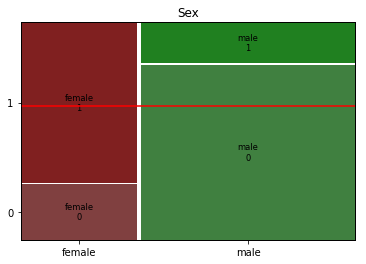

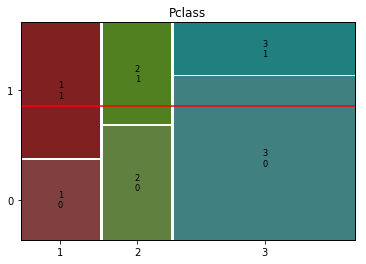

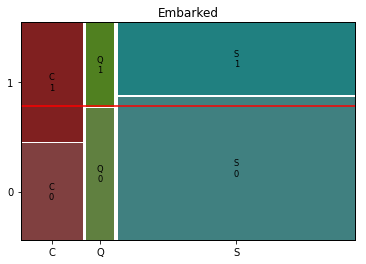

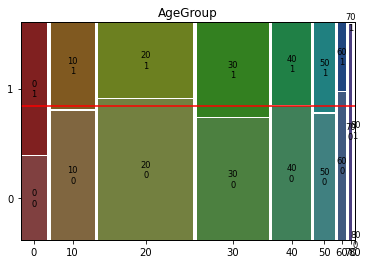

In [28]:
for i in ti_category:
    cross_ageGroup = pd.crosstab(ti[target], ti[i], normalize='index')
    mosaic(ti.sort_values([target, i]), [i, target], gap=0.01)
    plt.axhline(1- ti[target].mean(), color = 'r')
    plt.title(i)
    plt.show()

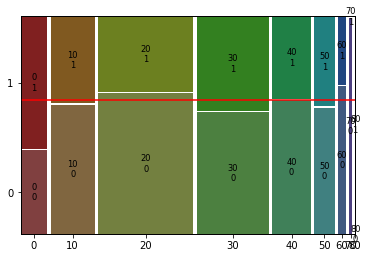

### 데이터 전처리

##### Nan 처리

In [31]:
ti.isna().sum()

nonNa_age = ti['Age'].dropna(axis=0)
nonNa_ageGroup = ti['AgeGroup'].dropna(axis=0)
nonNa_embarked = ti['Embarked'].dropna(axis=0)
nonNa_ti = ti.dropna(axis=0)

In [ ]:
# # sklearn nan 처리
# from sklearn.impute import SimpleImputer

# # nan 을 mean으로 처리
# imputer = SimpleImputer(strategy='mean')

# # 대상 리스트
# impute_list = ['CompPrice', 'Income']

# # 피팅하고 적용하기
# ti[impute_list] = imputer.fit_transform(ti[impute_list])
# ti.isna().sum()


##### Dummy Variable

In [37]:
ti['Pclass'] = ti['Pclass'].astype(str)
dummy = pd.get_dummies(data=ti[ti_category], drop_first=True)
ti_ = ti[['Survived', 'Age', 'Fare']]
dummy_ti = pd.concat([ti_, dummy], axis=1)
dummy_ti

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeGroup_10,AgeGroup_20,AgeGroup_30,AgeGroup_40,AgeGroup_50,AgeGroup_60,AgeGroup_70,AgeGroup_80
0,0,22.0,7.2500,1,0,1,0,1,0,1,0,0,0,0,0,0
1,1,38.0,71.2833,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,1,0,1,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,35.0,8.0500,1,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,0,1,0,0,0,0,0,0
887,1,19.0,30.0000,0,0,0,0,1,1,0,0,0,0,0,0,0
888,0,NaN,23.4500,0,0,1,0,1,0,0,0,0,0,0,0,0
889,1,26.0,30.0000,1,0,0,0,0,0,1,0,0,0,0,0,0


##### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
# MinMaxScaler : min 0 ~ max 1 로 스케일링
min_max = MinMaxScaler()
mm_scaler = min_max.fit_transform(dummy_ti)
mm_scaler = pd.DataFrame(mm_scaler, columns= list(dummy_ti))

mm_scaler.head()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeGroup_10,AgeGroup_20,AgeGroup_30,AgeGroup_40,AgeGroup_50,AgeGroup_60,AgeGroup_70,AgeGroup_80
0,0.0,0.271174,0.014151,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# StandardScaler : 평균 0, 표준편차 1 로 스케일링
standard = StandardScaler()
s_scaler = min_max.fit_transform(dummy_ti)
s_scaler = pd.DataFrame(s_scaler, columns= list(dummy_ti))

s_scaler.head()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeGroup_10,AgeGroup_20,AgeGroup_30,AgeGroup_40,AgeGroup_50,AgeGroup_60,AgeGroup_70,AgeGroup_80
0,0.0,0.271174,0.014151,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
